# DATA PREPROCESSING

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# LOAD DATA INTO tf.dataset

In [2]:
#comment
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELs=3
EPOCHS=20

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "PlantVillage",
   shuffle=True,
   image_size = (IMAGE_SIZE,IMAGE_SIZE),
   batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

# DATA VISUALIZATION

In [8]:
for image_batch, label_batch in dataset.take(1):
    print (image_batch[0].shape)

(256, 256, 3)


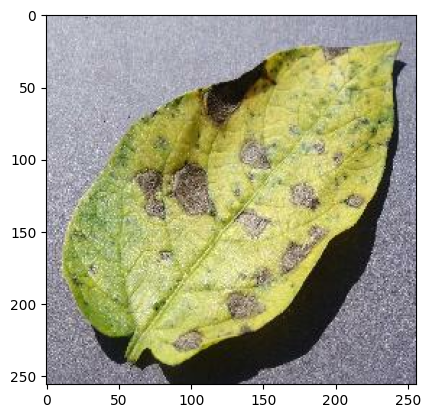

In [29]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

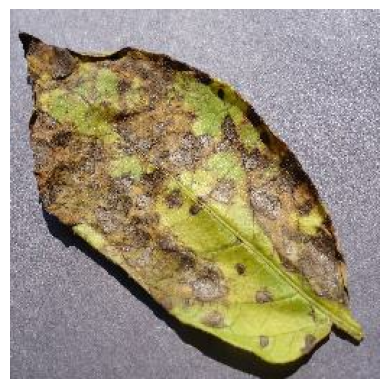

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

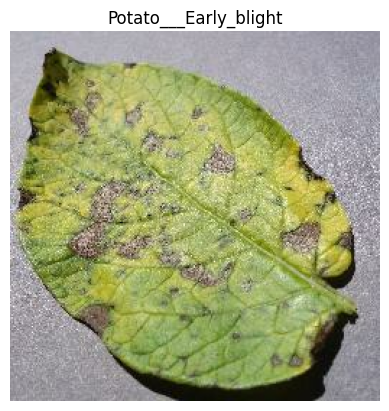

In [31]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    

# TRAIN TEST SPLIT

In [10]:
len(dataset)

68

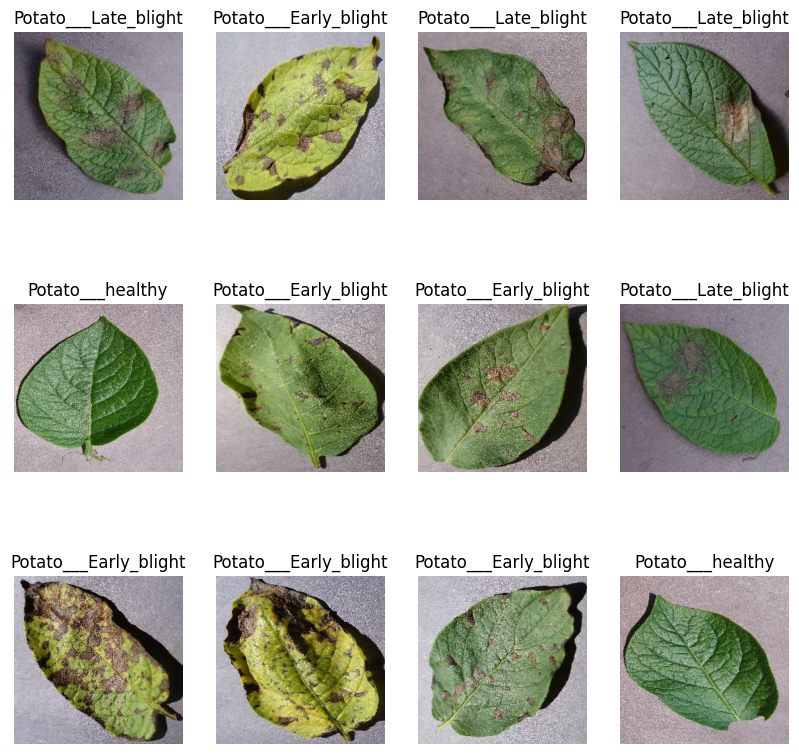

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [12]:
train_size = 0.8
len (dataset)*train_size

54.400000000000006

In [13]:
train_ds= dataset.take (54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip (54)
len (test_ds)

14

In [15]:
val_size=0.1
len (dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)
len (val_ds)

6

In [17]:
test_ds = test_ds.skip(6)
len (test_ds)

8

In [89]:
# def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
#     ds_size = len(ds)
    
#     if shuffle:
        
#         ds = ds.shuffle (shuffle_size, seed=12)
        
#     train_size = int(train_split * ds_size)
#     val_size = int(val_split * ds_size)
        
#     train_ds = ds.take(train_size)
        
#     val_ds = ds.skip(train_size).take (val_size)
#     test_ds = ds.skip(train_size).skip(val_size)
        
#     return train_ds, val_ds, test_ds

In [90]:
#train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [91]:
#len(train_ds)

54

In [92]:
#len(val_ds)

6

In [93]:
#len(test_ds)

8

# DATA AUGMENTATION

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch (buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch (buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch (buffer_size=tf.data.AUTOTUNE)

In [19]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[146. 134. 138.]
  [156. 144. 148.]
  [151. 139. 143.]
  ...
  [154. 135. 137.]
  [133. 114. 116.]
  [133. 114. 116.]]

 [[143. 131. 135.]
  [155. 143. 147.]
  [155. 143. 147.]
  ...
  [158. 139. 141.]
  [143. 124. 126.]
  [154. 135. 137.]]

 [[155. 143. 147.]
  [157. 145. 149.]
  [151. 139. 143.]
  ...
  [131. 112. 114.]
  [120. 101. 103.]
  [138. 119. 121.]]

 ...

 [[146. 127. 133.]
  [146. 127. 133.]
  [147. 128. 134.]
  ...
  [155. 136. 142.]
  [154. 135. 141.]
  [153. 134. 140.]]

 [[144. 125. 131.]
  [147. 128. 134.]
  [150. 131. 137.]
  ...
  [155. 136. 142.]
  [153. 134. 140.]
  [151. 132. 138.]]

 [[141. 122. 128.]
  [145. 126. 132.]
  [150. 131. 137.]
  ...
  [158. 139. 145.]
  [156. 137. 143.]
  [153. 134. 140.]]]


In [20]:
resize_and_rescale = tf.keras.Sequential([
layers.experimental.preprocessing.Resizing (IMAGE_SIZE, IMAGE_SIZE),layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.54901963 0.5019608  0.5411765 ]
  [0.54509807 0.49803922 0.5372549 ]
  [0.54509807 0.49803922 0.5372549 ]
  ...
  [0.57254905 0.53333336 0.5686275 ]
  [0.5568628  0.5176471  0.5529412 ]
  [0.5411765  0.5019608  0.5372549 ]]

 [[0.54509807 0.49803922 0.5372549 ]
  [0.5411765  0.49411765 0.53333336]
  [0.5411765  0.49411765 0.53333336]
  ...
  [0.57254905 0.53333336 0.5686275 ]
  [0.56078434 0.52156866 0.5568628 ]
  [0.54901963 0.50980395 0.54509807]]

 [[0.5411765  0.49411765 0.53333336]
  [0.5372549  0.49019608 0.5294118 ]
  [0.5411765  0.49411765 0.53333336]
  ...
  [0.5803922  0.5411765  0.5764706 ]
  [0.5764706  0.5372549  0.57254905]
  [0.5647059  0.5254902  0.56078434]]

 ...

 [[0.5176471  0.46666667 0.5058824 ]
  [0.5254902  0.4745098  0.5137255 ]
  [0.5176471  0.46666667 0.5058824 ]
  ...
  [0.60784316 0.5686275  0.6       ]
  [0.5803922  0.5411765  0.57254905]
  [0.5568628  0.5176471  0.54901963]]

 [[0.49411765 0.44313726 0.48235294]
  [0.5137255  0.4627451  0.5019608 ]


In [22]:
data_augmentation = tf.keras.Sequential ([
layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation (0.2),])

In [23]:
BATCH_SIZE

32

# BUILD AND TRAIN A CNN MODEL

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELs)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation, 
    layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation= 'relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),     
])

model.build(input_shape = input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [27]:
model.compile(
    optimizer='adam' ,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics= ['accuracy']
)

In [28]:
history = model.fit(
    train_ds, batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1, 
    epochs=EPOCHS
)

Epoch 1/20
54/54 [==============================] - 166s 2s/step - loss: 0.9110 - accuracy: 0.5226 - val_loss: 0.8614 - val_accuracy: 0.4635
Epoch 2/20
54/54 [==============================] - 124s 2s/step - loss: 0.6724 - accuracy: 0.6950 - val_loss: 0.4558 - val_accuracy: 0.7969
Epoch 3/20
54/54 [==============================] - 123s 2s/step - loss: 0.3981 - accuracy: 0.8287 - val_loss: 0.3024 - val_accuracy: 0.8802
Epoch 4/20
54/54 [==============================] - 119s 2s/step - loss: 0.3090 - accuracy: 0.8767 - val_loss: 0.3335 - val_accuracy: 0.8802
Epoch 5/20
54/54 [==============================] - 119s 2s/step - loss: 0.2324 - accuracy: 0.9051 - val_loss: 0.2055 - val_accuracy: 0.9115
Epoch 6/20
54/54 [==============================] - 117s 2s/step - loss: 0.2180 - accuracy: 0.9126 - val_loss: 0.1896 - val_accuracy: 0.9323
Epoch 7/20
54/54 [==============================] - 117s 2s/step - loss: 0.1818 - accuracy: 0.9300 - val_loss: 0.1777 - val_accuracy: 0.9323
Epoch 8/20
54

In [29]:
len(test_ds)

8

In [39]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 366ms/step - loss: 0.1652 - accuracy: 0.9440


In [41]:
scores

[0.1652444452047348, 0.943965494632721]

In [42]:
history

In [43]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history ['loss']
val_loss = history.history['val_loss']

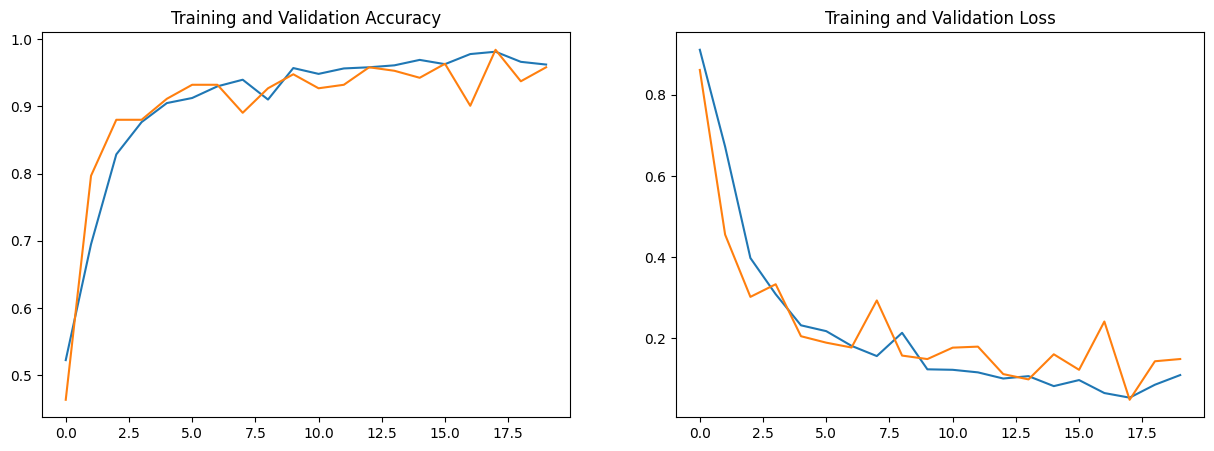

In [52]:
plt.figure(figsize= (15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 945ms/step
predicted label: Potato___Late_blight


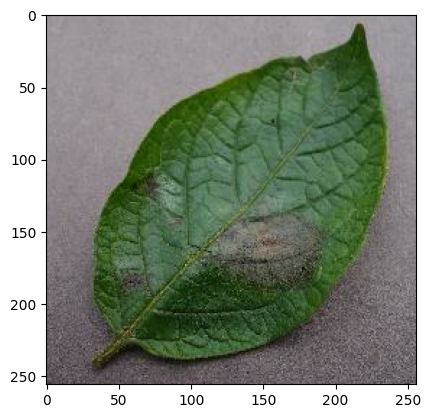

In [53]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [54]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 70ms/step


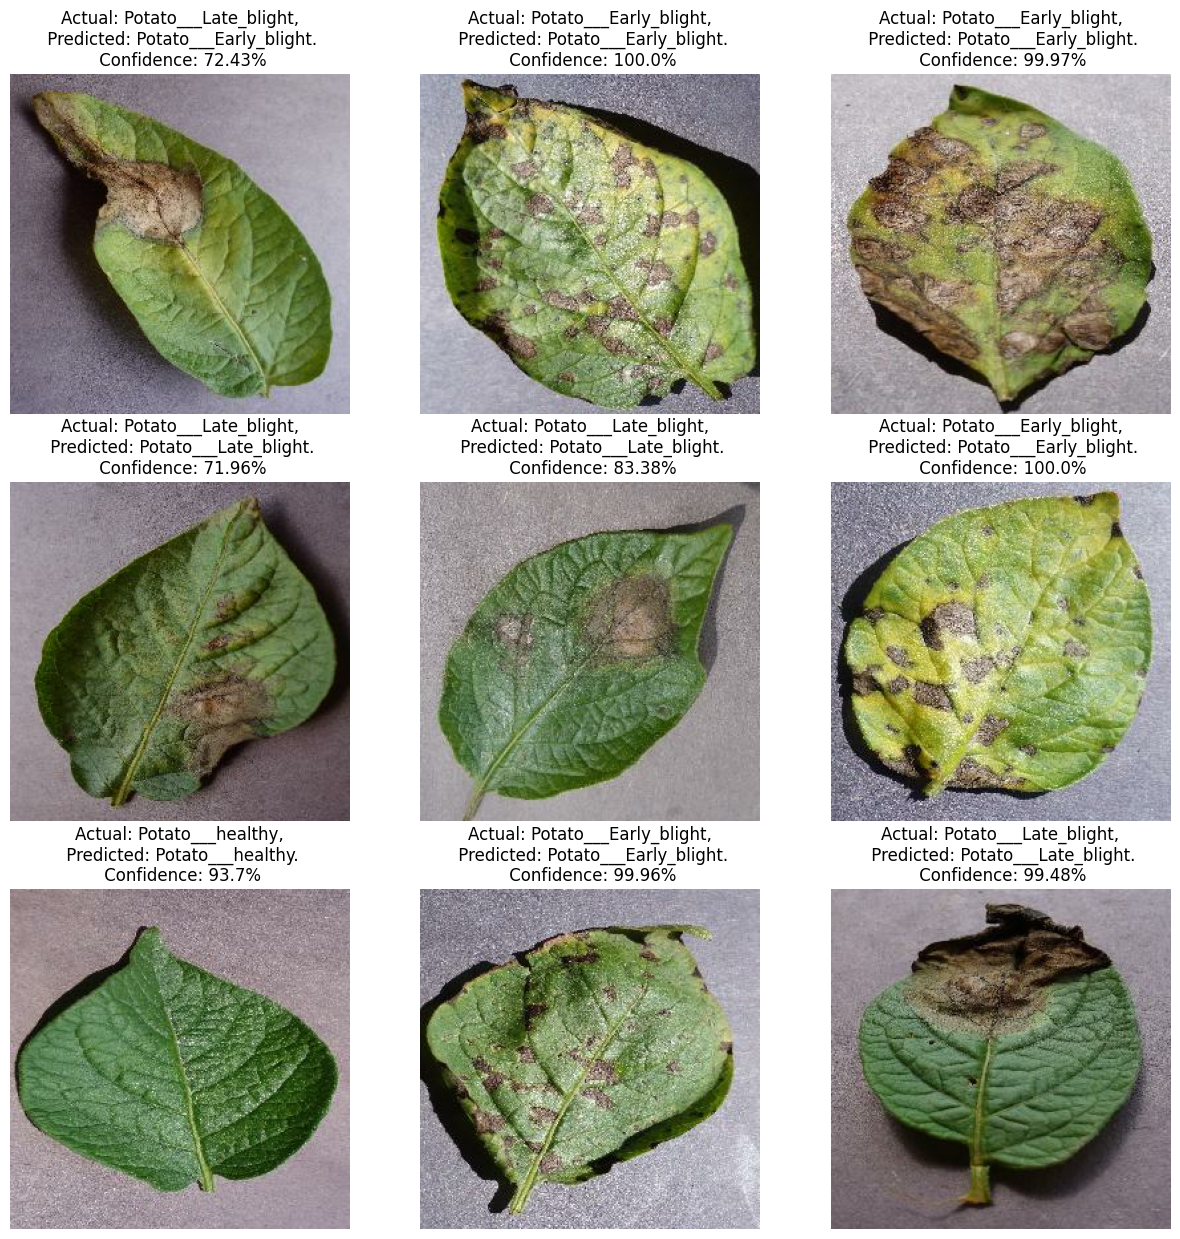

In [55]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")